# Projet de Airline
### Quoc Hiep DAO - M1 IA DS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
airlines = pd.read_csv('airlines.csv', na_values=[' '])
airports = pd.read_csv('airports.csv', na_values=[' '])
flights = pd.read_csv('flights.csv', na_values=[' '])
planes = pd.read_csv('planes.csv', na_values=[' '])
weather = pd.read_csv('weather.csv', na_values=[' '])

In [3]:
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [4]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [5]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [6]:
planes.head()

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan


In [7]:
weather.head()

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2013-01-01T04:00:00Z


## Check missing values

In [8]:
print('total rows :', flights.shape[0])
# missing values of flights
flights.isna().sum()

total rows : 336776


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [9]:
print('total rows :', planes.shape[0])
# missing values of planes
planes.isna().sum()

total rows : 3322


tailnum            0
year              70
type               0
manufacturer       0
model              0
engines            0
seats              0
speed           3299
engine             0
dtype: int64

la colonne de speed ne sert a rien ici car il manque presque tous les valeurs

In [10]:
print('total rows :', weather.shape[0])
# missing values of planes
weather.isna().sum()

total rows : 26130


origin           0
year             0
month            0
day              0
hour             0
temp             1
dewp             1
humid            1
wind_dir       418
wind_speed       3
wind_gust        3
precip           0
pressure      2730
visib            0
time_hour        0
dtype: int64

In [11]:
print('total rows :', airlines.shape[0])
# missing values of planes
airlines.isna().sum()

total rows : 16


carrier    0
name       0
dtype: int64

In [12]:
print('total rows :', airports.shape[0])
# missing values of planes
airports.isna().sum()

total rows : 1458


faa      0
name     0
lat      0
lon      0
alt      0
tz       0
dst      0
tzone    0
dtype: int64

Il n'y a pas de manquante valeur dans airlines et airports

In [13]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   faa     1458 non-null   object 
 1   name    1458 non-null   object 
 2   lat     1458 non-null   float64
 3   lon     1458 non-null   float64
 4   alt     1458 non-null   int64  
 5   tz      1458 non-null   int64  
 6   dst     1458 non-null   object 
 7   tzone   1458 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 91.2+ KB


In [14]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   carrier  16 non-null     object
 1   name     16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


In [15]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tailnum       3322 non-null   object 
 1   year          3252 non-null   float64
 2   type          3322 non-null   object 
 3   manufacturer  3322 non-null   object 
 4   model         3322 non-null   object 
 5   engines       3322 non-null   int64  
 6   seats         3322 non-null   int64  
 7   speed         23 non-null     float64
 8   engine        3322 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 233.7+ KB


In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26130 entries, 0 to 26129
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origin      26130 non-null  object 
 1   year        26130 non-null  int64  
 2   month       26130 non-null  int64  
 3   day         26130 non-null  int64  
 4   hour        26130 non-null  int64  
 5   temp        26129 non-null  float64
 6   dewp        26129 non-null  float64
 7   humid       26129 non-null  float64
 8   wind_dir    25712 non-null  float64
 9   wind_speed  26127 non-null  float64
 10  wind_gust   26127 non-null  float64
 11  precip      26130 non-null  float64
 12  pressure    23400 non-null  float64
 13  visib       26130 non-null  float64
 14  time_hour   26130 non-null  object 
dtypes: float64(9), int64(4), object(2)
memory usage: 3.0+ MB


In [17]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

## Analyse des donnees

### Combien y-a-t-il d’aéroports, de compagnies, de destinations, d’avions, de fuseaux horaires et de zones aux Etats-Unis où on ne passe pas à l’heure d’été (indice : colonne dst) ?

In [18]:
airports.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


In [19]:
print('totaux aeroports: ',airports.faa.count())

totaux aeroports:  1458


In [20]:
print('totales compagnies: ',airlines.carrier.count())

totales compagnies:  16


In [21]:
print('totales distinations',len(flights.dest.unique().tolist()))

totales distinations 105


In [22]:
flights.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [23]:
print('totales avions: ',len(flights.tailnum.unique().tolist()))

totales avions:  4044


In [24]:
print('total timezone: ',len(airports.tz.unique().tolist()))

total timezone:  7


In [25]:
airports[airports.dst != 'A'].tzone.unique().tolist()

['America/New_York',
 'America/Chicago',
 'America/Phoenix',
 'America/Denver',
 'Pacific/Honolulu',
 'America/Los_Angeles',
 'America/Anchorage']

In [26]:
# on a 7 zones aux Etats-Unis où on ne passe pas à l’heure d’été

### Quel est l’aéroport de départ le plus emprunté ? Quelles sont les 10 destinations les plus (moins) prisées ? Quelle sont les 10 avions qui ont le plus (moins) décollé ?

In [27]:
l1 = flights.origin.tolist()

In [28]:
from collections import Counter
Counter(l1)

Counter({'EWR': 120835, 'LGA': 104662, 'JFK': 111279})

In [29]:
print('aéroport de départ le plus emprunté est EWR')

aéroport de départ le plus emprunté est EWR


In [30]:
l2 = flights.dest.tolist()
c = Counter(l2)
d = {}
for key, value in c.items():
    d[key] = value

In [31]:
# 10 destinations les plus prisées
sorted(d, key=d.get, reverse=True)[:10]

['ORD', 'ATL', 'LAX', 'BOS', 'MCO', 'CLT', 'SFO', 'FLL', 'MIA', 'DCA']

In [32]:
# 10 destinations les moins prisées
sorted(d, key=d.get, reverse=False)[:10]

['LEX', 'LGA', 'ANC', 'SBN', 'HDN', 'MTJ', 'EYW', 'PSP', 'JAC', 'BZN']

In [33]:
l3 = flights.tailnum.tolist()
dict_avions = dict(Counter(l3))

In [34]:
# 10 avions qui ont le plus décollé
sorted(dict_avions, key=dict_avions.get, reverse=True)[1:11] 
# le premier element est Null, donc je prends le 2e a 11e element

['N725MQ',
 'N722MQ',
 'N723MQ',
 'N711MQ',
 'N713MQ',
 'N258JB',
 'N298JB',
 'N353JB',
 'N351JB',
 'N735MQ']

In [35]:
# 10 avions qui ont le moins décollé
sorted(dict_avions, key=dict_avions.get, reverse=False)[:10]

['N505SW',
 'N26906',
 'N837AW',
 'N801AW',
 'N835MH',
 'N5ECAA',
 'N7BFAA',
 'N590NW',
 'N916DN',
 'N859AS']

### Trouver combien chaque compagnie a desservi de destination ; combien chaque compagnie a desservie de destination par aéroport d’origine. Réaliser les graphiques adéquats qui synthétisent ces informations ?

In [36]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z


In [37]:
l_dest = flights.dest.unique().tolist()

In [38]:
df_carrier_dest = flights[['carrier','dest']]
carrier = df_carrier_dest.carrier.unique().tolist()
d = dict()
[d.update( {compagnie : []} ) for compagnie in carrier]
for i in range(0, df_carrier_dest.shape[0]-1):
    key = df_carrier_dest['carrier'][i]
    d[key].append(df_carrier_dest['dest'][i])

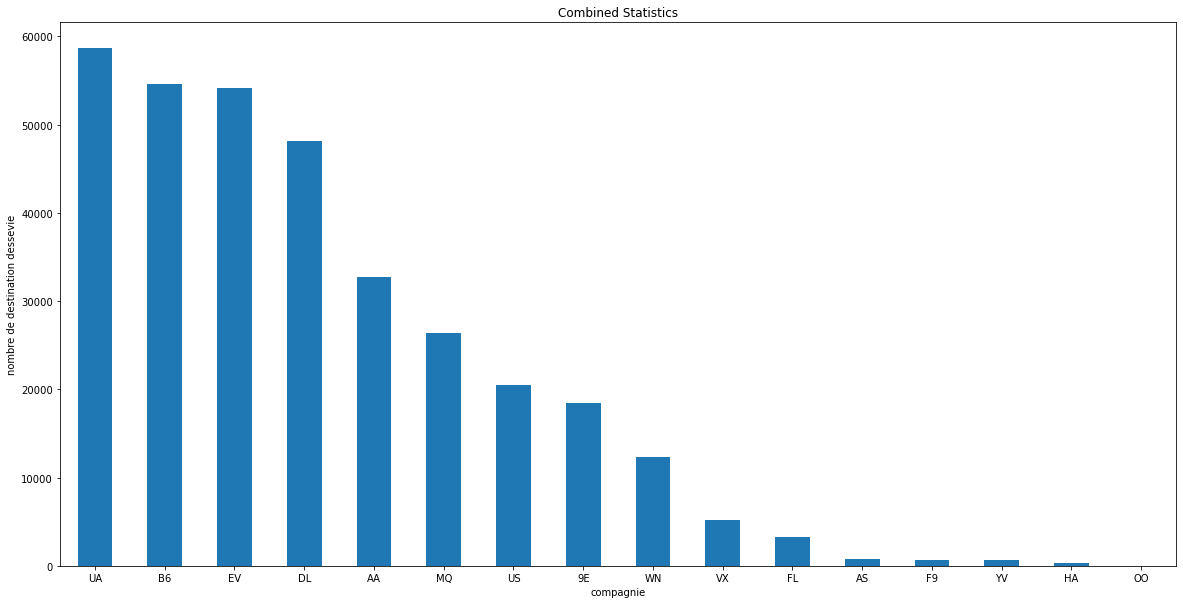

In [39]:
ndf_carrier_dest = df_carrier_dest.groupby(by='carrier')
n = ndf_carrier_dest.describe()
plt.figure(figsize=(20,10))
n[('dest',  'count')].sort_values(ascending=False).plot.bar(rot=0)
plt.title("Combined Statistics")
plt.xlabel("compagnie")
plt.ylabel("nombre de destination dessevie")
plt.show()

In [40]:
d_comp_dest = dict()
[d_comp_dest.update( {compagnie : len(d[compagnie])} ) for compagnie in carrier]
d_comp_dest
# combien chaque compagnie a desservi de destination

{'UA': 58665,
 'AA': 32729,
 'B6': 54635,
 'DL': 48110,
 'EV': 54173,
 'MQ': 26396,
 'US': 20536,
 'WN': 12275,
 'VX': 5162,
 'FL': 3260,
 'AS': 714,
 '9E': 18460,
 'F9': 685,
 'HA': 342,
 'YV': 601,
 'OO': 32}

In [41]:
# Combien chaque compagnie a desservie de destination par aéroport d’origine
flights[['origin','carrier','dest']].groupby(['origin','carrier']).describe()

dest                  
                count unique  top  freq
origin carrier                         
EWR    9E        1268      4  CVG   855
       AA        3487      3  DFW  2054
       AS         714      1  SEA   714
       B6        6557      7  BOS  1826
       DL        4342      4  ATL  3153
       EV       43939     54  DTW  2529
       MQ        2276      1  ORD  2276
       OO           6      2  MSP     4
       UA       46087     47  SFO  4344
       US        4405      3  CLT  3232
       VX        1566      2  LAX   783
       WN        6188      9  MDW  2043
JFK    9E       14651     34  DCA  1074
       AA       13783     17  LAX  3217
       B6       42076     42  MCO  3304
       DL       20701     29  LAX  2501
       EV        1408      3  IAD  1406
       HA         342      1  HNL   342
       MQ        7193     11  DCA  2194
       UA        4534      2  SFO  2475
       US        2995      3  CLT  1862
       VX        3596      5  LAX  1797
LGA    9E        2541     39  DAY   391
       AA       15459      5  ORD  5694
       B6        6002      6  FLL  2188
       DL       23067     22  ATL  5544
       EV        8826     45  IAD  1407
       F9         685      1  DEN   685
       FL        3260      3  ATL  2337
       MQ       16928     12  RDU  3334
       OO          26      3  CLE    24
       UA        8044      4  ORD  3162
       US       13136      4  DCA  4716
       WN        6087      8  MDW  2070
       YV         601      3  IAD   311

In [42]:
df_origin_compagnie_count_destination = flights[['origin','carrier','dest']].groupby(['origin','carrier']).describe()[('dest',  'count')]

on va analyser dans la suite chaque aeroport origin

#### Pour EWR

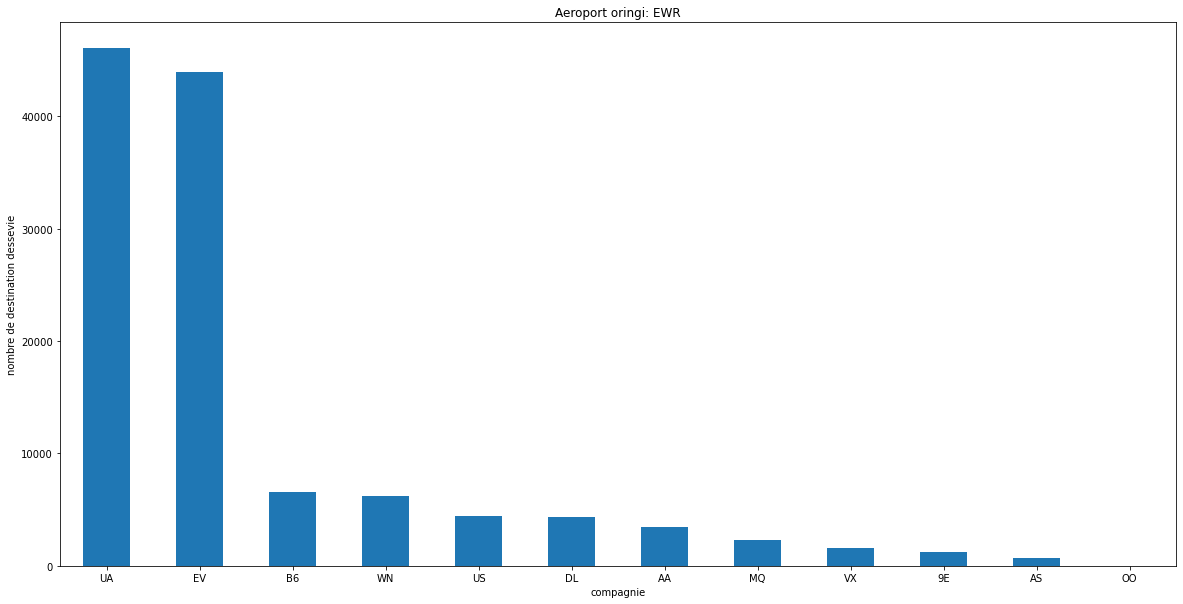

In [43]:
plt.figure(figsize=(20,10))
df_origin_compagnie_count_destination['EWR'].sort_values(ascending=False).plot.bar(rot=0)
plt.title("Aeroport oringi: EWR")
plt.xlabel("compagnie")
plt.ylabel("nombre de destination dessevie")
plt.show()

In [44]:
df_origin_compagnie_count_destination['EWR'].sort_values(ascending=False)

carrier
UA    46087
EV    43939
B6     6557
WN     6188
US     4405
DL     4342
AA     3487
MQ     2276
VX     1566
9E     1268
AS      714
OO        6
Name: (dest, count), dtype: object

#### Pour JFK

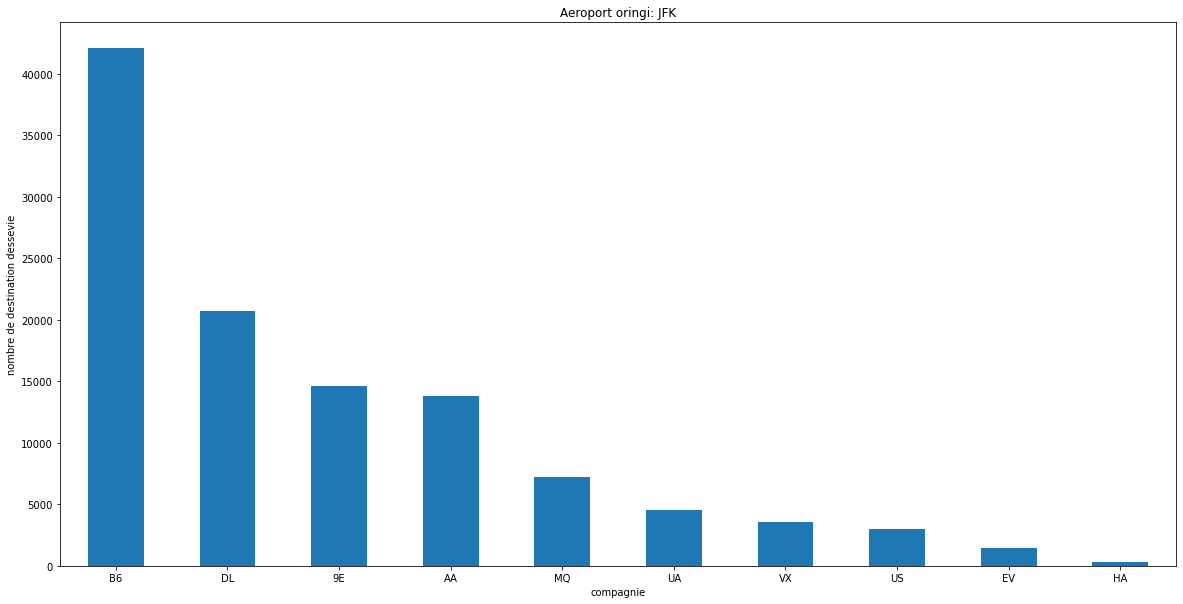

In [45]:
plt.figure(figsize=(20,10))
df_origin_compagnie_count_destination['JFK'].sort_values(ascending=False).plot.bar(rot=0)
plt.title("Aeroport oringi: JFK")
plt.xlabel("compagnie")
plt.ylabel("nombre de destination dessevie")
plt.show()

In [46]:
df_origin_compagnie_count_destination['JFK'].sort_values(ascending=False)

carrier
B6    42076
DL    20701
9E    14651
AA    13783
MQ     7193
UA     4534
VX     3596
US     2995
EV     1408
HA      342
Name: (dest, count), dtype: object

#### Pour LGA

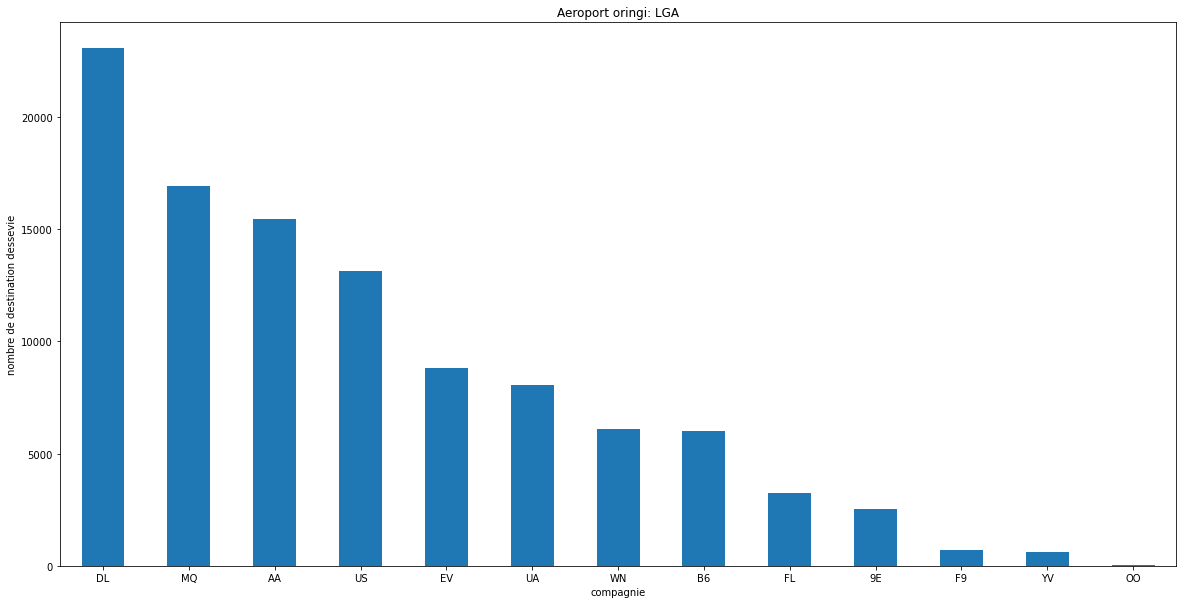

In [47]:
plt.figure(figsize=(20,10))
df_origin_compagnie_count_destination['LGA'].sort_values(ascending=False).plot.bar(rot=0)
plt.title("Aeroport oringi: LGA")
plt.xlabel("compagnie")
plt.ylabel("nombre de destination dessevie")
plt.show()

In [48]:
df_origin_compagnie_count_destination['LGA'].sort_values(ascending=False)

carrier
DL    23067
MQ    16928
AA    15459
US    13136
EV     8826
UA     8044
WN     6087
B6     6002
FL     3260
9E     2541
F9      685
YV      601
OO       26
Name: (dest, count), dtype: object

### Trouver tous les vols ayant atterri à Houston (IAH ou HOU) (indice : 9313 vols). Combien de vols partent de NYC airports vers Seattle (indice : 3923 vols), combien de compagnies desservent cette destination (indice : 5 compagnies) et combien d’avions “uniques” (indice : 935 avions) ?

In [49]:
# tous les vols ayant atterri à Houston (IAH ou HOU)
print('nombre total de vols ayant atterri à Houston: ',len(flights[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')]['flight'].tolist()))
flights[(flights['dest'] == 'IAH') | (flights['dest'] == 'HOU')]['flight'].tolist()

nombre total de vols ayant atterri à Houston:  9313


[1545,
 1714,
 496,
 473,
 1479,
 1220,
 1004,
 455,
 1086,
 1461,
 625,
 1280,
 2596,
 1258,
 997,
 1695,
 1178,
 1259,
 1066,
 1712,
 1128,
 1233,
 629,
 834,
 1453,
 407,
 473,
 1509,
 20,
 251,
 667,
 493,
 1563,
 491,
 625,
 1461,
 633,
 3294,
 1153,
 566,
 1695,
 1178,
 1259,
 1125,
 2529,
 1128,
 1221,
 629,
 834,
 1018,
 1136,
 468,
 20,
 1091,
 482,
 1718,
 76,
 651,
 583,
 1105,
 625,
 428,
 2596,
 1249,
 477,
 53,
 1066,
 1259,
 1134,
 1022,
 891,
 1601,
 629,
 1018,
 404,
 1662,
 20,
 248,
 10,
 1548,
 1718,
 1639,
 354,
 1461,
 625,
 317,
 2596,
 428,
 477,
 53,
 1672,
 1259,
 1066,
 1134,
 891,
 1416,
 629,
 1077,
 1556,
 431,
 3995,
 1162,
 1108,
 214,
 332,
 237,
 954,
 625,
 2101,
 1029,
 1623,
 53,
 1178,
 1279,
 629,
 799,
 1662,
 1599,
 646,
 1110,
 1548,
 680,
 518,
 625,
 1722,
 1623,
 2239,
 1604,
 275,
 1205,
 1178,
 891,
 1134,
 508,
 1675,
 1416,
 629,
 1545,
 927,
 1663,
 3483,
 10,
 451,
 80,
 1001,
 1130,
 583,
 625,
 1461,
 317,
 2239,
 428,
 750,
 1421,
 

In [50]:
# Combien de vols partent de NYC airports vers Seattle
len(flights[(flights['dest'] == 'SEA') ]['flight'].tolist())

3923

In [51]:
# Il y a 5 compagnies desservent cette destination
flights[(flights['dest'] == 'SEA') ]['carrier'].unique().tolist()

['AS', 'DL', 'UA', 'B6', 'AA']

In [52]:
# combien d’avions “uniques”
len(flights[(flights['dest'] == 'SEA') ]['tailnum'].unique().tolist())

936

### Trouver le nombre de vols unique par destination voir l’aperçu. Trier les vols suivant la destination, l’aéroport d’origine, la compagnie dans un ordre alphabétique croissant (en réalisant les jointures nécessaires pour obtenir les noms des explicites des aéroports) ? indice : voir l’aperçu

In [85]:
df1 = flights[['dest','flight']]
df3 = df1.drop_duplicates() # delete doublons

In [86]:
df3.head()

,dest,flight
0,IAH,1545
1,IAH,1714
2,MIA,1141
3,BQN,725
4,ATL,461


In [55]:
df2 = airports[['faa','name']]
df2.head()

,faa,name
0,04G,Lansdowne Airport
1,06A,Moton Field Municipal Airport
2,06C,Schaumburg Regional
3,06N,Randall Airport
4,09J,Jekyll Island Airport


In [87]:
df4 = df3.merge(df2, left_on='dest', right_on='faa')

In [88]:
df4.head()

,dest,flight,faa,name
0,IAH,1545,IAH,George Bush Intercontinental
1,IAH,1714,IAH,George Bush Intercontinental
2,IAH,496,IAH,George Bush Intercontinental
3,IAH,473,IAH,George Bush Intercontinental
4,IAH,1479,IAH,George Bush Intercontinental


In [92]:
df4.groupby(['name']).describe()[('flight','count')].sort_values(ascending=False)[:15]

name
George Bush Intercontinental          665.0
Chicago Ohare Intl                    617.0
General Edward Lawrence Logan Intl    469.0
Charlotte Douglas Intl                449.0
Denver Intl                           435.0
San Francisco Intl                    432.0
Los Angeles Intl                      399.0
Orlando Intl                          332.0
Fort Lauderdale Hollywood Intl        313.0
Cleveland Hopkins Intl                311.0
Chicago Midway Intl                   306.0
Hartsfield Jackson Atlanta Intl       300.0
Detroit Metro Wayne Co                272.0
Miami Intl                            266.0
Mc Carran Intl                        261.0
Name: (flight, count), dtype: float64

In [81]:
# Trouver le nombre de vols unique par destination
df3.groupby('dest').describe()[('flight','count')].sort_values(ascending=False)

dest
ORD    17283.0
ATL    17215.0
LAX    16174.0
BOS    15508.0
MCO    14082.0
        ...   
MTJ       15.0
SBN       10.0
ANC        8.0
LEX        1.0
LGA        1.0
Name: (flight, count), Length: 101, dtype: float64

### question 6 pas fini

### Quelles sont les compagnies qui n'opèrent pas sur tous les aéroports d’origine ? Quelles sont les compagnies qui desservent l’ensemble de destinations ?
### Faire un tableau où l’on récupère l’ensemble des origines et des destinations pour l’ensemble des compagnies.

In [59]:
flights.origin.unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [60]:
# les compagnies qui n'opèrent pas sur tous les aéroports d’origine
s1 = flights[['origin','carrier']].groupby('carrier').describe()[('origin','unique')].sort_values(ascending=False)
[s1.index.tolist()[i] for i in range(len(s1)) if s1[i] < 3]

['WN', 'VX', 'OO', 'YV', 'HA', 'FL', 'F9', 'AS']

In [61]:
# les compagnies qui desservent l’ensemble de destinations
s2 = flights[['dest','carrier']].groupby('carrier').describe()[('dest','unique')].sort_values(ascending=False)
[s2.index.tolist()[i] for i in range(len(s2)) if s2[i] == len(flights.dest.unique().tolist())]

[]

In [62]:
s2

carrier
EV    61
9E    49
UA    47
B6    42
DL    40
MQ    20
AA    19
WN    11
US     6
VX     5
OO     5
YV     3
FL     3
HA     1
F9     1
AS     1
Name: (dest, unique), dtype: object

In [63]:
pd.concat([s2, s1], axis=1)

,dest,origin
,unique,unique
EV,61,3
9E,49,3
UA,47,3
B6,42,3
DL,40,3
MQ,20,3
AA,19,3
WN,11,2
US,6,3


### Quelles sont les destinations qui sont exclusives à certaines compagnies

In [64]:
s3 = flights[['dest','carrier']].groupby('dest').describe()[('carrier','unique')].sort_values(ascending=False)
l3 = [s3.index.tolist()[i] for i in range(len(s3)) if s3[i] == 1]

In [65]:
len(l3)

29

In [66]:
np.array(l3)

array(['CAK', 'ACK', 'BUR', 'BZN', 'BHM', 'CHO', 'ANC', 'ALB', 'LGB',
       'CRW', 'EYW', 'TUL', 'SNA', 'SMF', 'SBN', 'SAV', 'PVD', 'PSP',
       'PSE', 'OKC', 'OAK', 'MYR', 'MTJ', 'MDW', 'LGA', 'LEX', 'ILM',
       'HDN', 'ABQ'], dtype='<U3')

### Filtrer le vol pour trouver ceux exploités par United(UA), American(AA) ou Delta(DL)

In [67]:
flights[(flights['carrier']=='UA') | (flights['carrier']=='AA') | (flights['carrier']=='DL')]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T05:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T05:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T05:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T06:00:00Z
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01T05:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336737,2013,9,30,2105.0,2106,-1.0,2329.0,2354,-25.0,UA,475,N477UA,EWR,IAH,175.0,1400,21,6,2013-09-30T21:00:00Z
336744,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,DL,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30T21:00:00Z
336751,2013,9,30,2140.0,2140,0.0,10.0,40,-30.0,AA,185,N335AA,JFK,LAX,298.0,2475,21,40,2013-09-30T21:00:00Z
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-09-30T21:00:00Z
